<h1><center>COVID-19 ANALYSIS</center></h1>

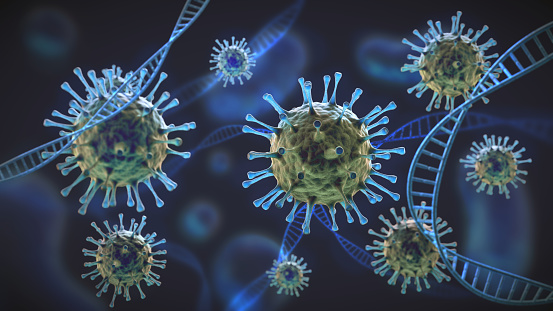

## EXECUTIVE SUMMARY

## TABLE OF CONTENTS
* [INTRODUCTION](#introduction)
* [METHODOLOGY](#methodology)
    * [INSTALLING AND IMPORTING LIBRARIES](#installing_importing_libraries)
    * [DATA COLLECTION](#data_collection)
    * [DATA PREPROCESSING](#data_preprocessing)
    * [EXPLORATORY  DATA  ANALYSIS](#exploratory_data_analysis)
* [CONCLUSION](#conclusion)
* [REFERENCES](#references)
* [APPENDIX](#appendix)

## INTRODUCTION <a class="anchor" id="introduction"></a>

**COVID-19** is the disease which is caused by a type of coronavirus (later named **SARS-Cov-2**), that emerged in December 2019. The first case of COVID-19 was reported in December 1st 2019, and as of March 3rd 2022, there are over **440 million** cases with over **5.9 million** deaths worldwide. SARS-Cov-2 is believed to have originated in an animal, and then mutated to infect humans. COVID-19 has caused million of deaths worldwide, and some people have who survived the illness experienced prolonged health effects. It is more contagious than the influenza (flu), and is only diagnosed with a laboratory test. [[1]](#1) 

The only ways of minimizing/reducing the risk of contracting COVID-19 includes:
* Physical Distancing (at least 6 feet apart).
* Wearing masks.
* Washing hands frequently with soap and water.
* Using alcohol-based hand sanitizers.
* Avoid touching your eyes, nose and mouth.
* Staying away from other who feel sick.

The main symptoms of COVID-19 include [[2]](#2):
* Fever
* Coughing
* Shortness of breath
* Breathing difficulty
* Fatigue (tiredness)
* Chills (sometimes with shivering)
* Body aches
* Headaches
* Sore throat
* Congestion/runny nose
* Loss of smell or taste
* Nausea
* Diarrhea

The structure of coronaviruses is shown below [[3]](#3):
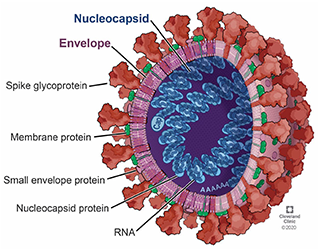

**Problem Statement: To analyze the number of COVID-19 cases and deaths from different countries, with dates ranging from 2020-02-24 to 2022-02-17.**

## METHODOLOGY <a class="anchor" id="methodology"></a>
1. [Installing and importing libraries](#installing_importing_libraries) - The required libraries were installed and imported.
2. [Data Collection](#data_collection) - The COVID-19 dataset was downloaded from [here](https://www.kaggle.com/georgesaavedra/covid19-dataset). A dataset containing countries and their coordinates (latitude and longditude) was obtained from [here](https://developers.google.com/public-data/docs/canonical/countries_csv). Both datasets were then loaded into Pandas DataFrames.
3. [Data Preprocessing](#data_preprocessing) - Before analyzing and visualizing the data, the datasets was cleaned and wrangled to ensure that they were in a presentable format. 
4. [Exploratory Data Analysis](#exploratory_data_analysis) - Exploratory Data Analysis (EDA) was performed to discover insights about the data.

### INSTALLING AND IMPORTING LIBRARIES <a class="anchor" id="installing_importing_libraries"></a>

**The required libraries were installed.**

The command to install packages/libraries are: **!pip install [library]** 

The following libraries were installed: NumPy, Pandas, Matplotlib, Seaborn and Folium.

In [139]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install folium

**The required libraries were imported.**

For this project, the only external libraries that were required were: NumPy, Pandas, Matplotlib, Seaborn and Folium. Some standard libraries were also imported.

In [140]:
import os # For interacting with the operating system e.g. checking if a file exists.
import sys # For terminating the program.

import numpy as np # Library for utlizing high performance arrays.
import pandas as pd # Library for data cleaning, manipulation and analysis.
import matplotlib.pyplot as plt # Library for data visualization.
import seaborn as sns # Library for data visualization.
import folium # Library for geospatial visualization.

### DATA COLLECTION <a class="anchor" id="data_collection"></a>

The COVID-19 dataset was downloaded from [here](https://www.kaggle.com/georgesaavedra/covid19-dataset). It contains information about COVID-19 cases by country with dates ranging from 2020-02-24 to 2022-02-17.

Since the dataset is a CSV (Comma Separated Value) file, it is loaded into a Pandas DataFrame using the read_csv() function.

In [141]:
filename = 'data/covid_19_dataset.csv' # File Path.

if os.path.exists(filename): # Checks if the file exists.
    if filename.endswith('.csv'): # Checks if the file is a CSV file.
        df = pd.read_csv(filename) # Loads the dataset into a Pandas DataFrame.
    else:
        print(f'{filename} is not a CSV file') # Displays a message that the file is not a CSV file
        print('Program terminated...\n') # Displays a message that the program is terminated.
        sys.exit() # Terminates the program.
else:
    print(f'{filename} does not exist.') # Displays a message that the file does not exist.
    print('Program terminated...\n') # Displays a message that the program is terminated.
    sys.exit() # Terminates the program.

In [142]:
df.head() # Displays the first 5 rows of the "df" DataFrame.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [143]:
df.tail() # Displays the last 5 rows of the DataFrame.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
162602,ZWE,Africa,Zimbabwe,2022-02-13,231381.0,82.0,139.857,5374.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162603,ZWE,Africa,Zimbabwe,2022-02-14,231603.0,222.0,171.571,5374.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162604,ZWE,Africa,Zimbabwe,2022-02-15,231603.0,0.0,142.857,5374.0,0.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162605,ZWE,Africa,Zimbabwe,2022-02-16,232213.0,610.0,210.429,5379.0,5.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162606,ZWE,Africa,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


There are 67 columns in the DataFrame. **Most** of the columns contain missing values.

In [144]:
 df.info() # Displays information about the columns in the "df" DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162607 entries, 0 to 162606
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    162607 non-null  object 
 1   continent                                   152859 non-null  object 
 2   location                                    162607 non-null  object 
 3   date                                        162607 non-null  object 
 4   total_cases                                 159642 non-null  float64
 5   new_cases                                   159616 non-null  float64
 6   new_cases_smoothed                          158465 non-null  float64
 7   total_deaths                                141946 non-null  float64
 8   new_deaths                                  142122 non-null  float64
 9   new_deaths_smoothed                         141992 non-null  float64
 

In [145]:
df.describe(include='all') # Displays statistical information about the columns in the "df" DataFrame.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,162607,152859,162607,162607,1.596420e+05,1.596160e+05,1.584650e+05,1.419460e+05,142122.000000,141992.000000,...,103684.000000,102261.000000,67022.000000,120914.000000,151784.000000,133199.000000,5.520000e+03,5520.000000,5532.000000,5520.000000
unique,238,6,238,779,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2021-08-22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,779,38537,779,238,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.409186e+06,1.113121e+04,1.104852e+04,5.628826e+04,171.251537,170.396181,...,10.630869,32.771251,50.783030,3.028169,73.577365,0.725641,3.685615e+04,9.213859,15.987232,924.226535
std,NaN,NaN,NaN,NaN,1.451968e+07,8.234078e+04,7.994272e+04,2.951279e+05,833.832188,811.973637,...,10.560549,13.519607,31.808301,2.450961,7.493322,0.149988,1.027585e+05,16.497870,30.375823,1373.111371
min,NaN,NaN,NaN,NaN,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,NaN,NaN,NaN,NaN,1.876000e+03,1.000000e+00,6.714000e+00,7.600000e+01,0.000000,0.143000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-8.922500e+01,-0.890000,-0.830000,-37.027419
50%,NaN,NaN,NaN,NaN,2.474250e+04,7.800000e+01,1.040000e+02,7.540000e+02,2.000000,2.429000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.217500e+03,5.755000,7.130000,436.789598
75%,NaN,NaN,NaN,NaN,2.838548e+05,1.037000e+03,1.103286e+03,7.093000e+03,19.000000,20.571000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.413720e+04,14.300000,22.947500,1578.960127


A dataset containing countries and their coordinates (latitude and longitude) was obtained from [here](https://developers.google.com/public-data/docs/canonical/countries_csv). The latitude and longditude of each country will be extracted from this dataset and then added to the "df" DataFrame, which will be used for geospatial visualization.

Since the dataset is a CSV (Comma Separated Value) file, it was loaded into a Pandas DataFrame using the read_csv() function.

In [146]:
filename = 'data/coordinates.csv' # File Path.

if os.path.exists(filename): # Checks if the file exists.
    if filename.endswith('.csv'): # Checks if the file is a CSV file.
        coordinates_df = pd.read_csv(filename, encoding = "ISO-8859-1") # Loads the dataset into a Pandas DataFrame.
    else:
        print(f'{filename} is not a CSV file') # Displays a message that the file is not a CSV file
        print('Program terminated...\n') # Displays a message that the program is terminated.
        sys.exit() # Terminates the program.
else:
    print(f'{filename} does not exist.') # Displays a message that the file does not exist.
    print('Program terminated...\n') # Displays a message that the program is terminated.
    sys.exit() # Terminates the program.

In [147]:
coordinates_df.head() # Displays the first 5 rows of the "coordinates_df" DataFrame.

,name,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [148]:
coordinates_df.tail() # Displays the last 5 rows of the "coordinates_df" DataFrame.

,name,latitude,longitude
239,Yemen,15.552727,48.516388
240,Mayotte,-12.827500,45.166244
241,South Africa,-30.559482,22.937506
242,Zambia,-13.133897,27.849332
243,Zimbabwe,-19.015438,29.154857


There are 3 columns in the DataFrame. **None** of the columns contain missing values.

In [149]:
coordinates_df.info() # Displays information about the columns in the "coordinates_df" DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [150]:
coordinates_df.describe(include='all') # Displays statistical information about the columns in the "coordinates_df"  DataFrame.

,name,latitude,longitude
count,244,244.000000,244.000000
unique,244,NaN,NaN
top,Burundi,NaN,NaN
freq,1,NaN,NaN
mean,NaN,16.253109,13.294814
std,NaN,27.031206,73.976477
min,NaN,-75.250973,-177.156097
25%,NaN,-0.301710,-38.092008
50%,NaN,16.869235,18.182149
75%,NaN,38.965238,49.046734


### DATA PREPROCESSING <a class="anchor" id="data_preprocessing"></a>

Before analyzing and visualizing the data, the data needs to be cleaned. The process of data cleaning involves three steps:
1. Handling missing values in rows or columns (either by removing or replacing them).
2. Removing duplicate rows.
3. Dealing with data in the wrong format (such as an incorrect date format).

Missing values in the "df" DataFrame were replaced with "np.nan" values.

In [151]:
df.replace(r'^\s*$', np.nan, inplace=True) # Replaces any missing values with "np.nan" values in the "df" DataFrame.

Duplicate rows were removed from the "df" DataFrame.

In [152]:
df.drop_duplicates(inplace=True) # Removes any duplicate rows in the "df" DataFrame.

It was observed the the "date" column in the "df" DataFrame is of the "object" datatype. The "date" column was then converted to the"<M8[ns]" datatype. The "<M8[ns]" datatype is a specific representation of the "datetime64[ns]" datatype.

In [153]:
df['date'] = pd.to_datetime(df['date']).dt.date # Converts the datatype of the "date" column in the "df" DataFrame to "<M8[ns]".
df['date'].dtype # Displays the datatype of the "date" column in the "df" DataFrame.

dtype('O')

The columns that are were not required for the analysis were removed from the "df" DataFrame.

In [154]:
# List of columns that are not required for the analysis.
columns = ['iso_code', 'continent', 'new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million',  
           'new_cases_smoothed_per_million', 'total_deaths_per_million', 'total_cases_per_million', 'new_deaths_per_million', 
           'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 
           'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'reproduction_rate', 'icu_patients','weekly_hosp_admissions', 
           'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
           'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 
           'people_vaccinated', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 
           'new_vaccinations_smoothed_per_million', 'total_boosters', 'new_vaccinations','new_vaccinations_smoothed', 
           'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'new_people_vaccinated_smoothed',  
           'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older',   
           'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 
           'male_smokers', 'handwashing_facilities', 'excess_mortality_cumulative_absolute', 'human_development_index', 
           'excess_mortality_cumulative', 'excess_mortality', 'hospital_beds_per_thousand', 'life_expectancy',
           'excess_mortality_cumulative_per_million']

df.drop(columns, axis=1, inplace=True) # Drops the columns from the DataFrame.

The latitude and longitude for each country were extracted from the "country_df" DataFrame, and stored in a dictionary.

In [155]:
# Obtains the values in the "name" column of the "coordinates_df" DataFrame, and then convert it into a NumPy array.
countries = coordinates_df['name'].to_numpy() 
# Obtains the values in the "latitude" column of the "coordinates_df" DataFrame, and then convert it into a NumPy array.
latitudes = coordinates_df['latitude'].to_numpy()
# Obtains the values in the "longitude" column of the "coordinates_df" DataFrame, and then convert it into a NumPy array.
longitudes = coordinates_df['longitude'].to_numpy()

coordinates = {} # Empty dictionary to store the coordinates of each country.

# Loops through each country, latitude and longitude in each of the lists simultaneously.
for country, latitude, longditude in zip(countries, latitudes, longitudes): 
    coordinates[country.lower()] = [latitude, longditude] # Stores the latitude and longitude of the country in the dictionary.

Two lists were created for adding the latitudes and longitudes of the countries in the "df" DataFrame.

In [156]:
# Converts each value in the "location" column of the "df" DataFrame into lowercase values.
df['location'] = df['location'].str.lower() 

latitudes = [] # Empty list to store the latitude of each country in the "df" DataFrame.
longitudes = [] # Empty list to store the longitude of each country in the "df" DataFrame.

for country in df['location']: # Loops through each value in the "location" column of the "df" DataFrame.
    if country in coordinates: # Checks if the country is present in the "coordinates" dictionary.
        latitudes.append(coordinates[country][0]) # Appends the first value of the country to the latitudes list.
        longitudes.append(coordinates[country][1]) # Appends the second value in the country to the longitude list.
    else:
        # Appends a "np.nan" value to the latitudes list, if the country was not present in the "location" column of the "df" DataFrame.
        latitudes.append(np.nan)
        # Appends a "np.nan" value to the longitudes list, if the country was not present in the "location" column of the "df" DataFrame.
        longitudes.append(np.nan)

Two columns were created in the "df" DataFrame for storing the latitudes and longitudes of each country.

In [157]:
df['latitude'] = latitudes # Creates a "latitude" column in the "df" DataFrame to store the latitude of each country.
df['longitude'] = longitudes # Creates a "longitude" column in the "df" DataFrame to store the latitude of each country.

Rows that contain missing values were removed from the DataFrame.

In [158]:
df.dropna(inplace=True) # Removes any rows that have missing values from the "df" DataFrame.

The columns in the "df" DataFrame was rearranged into a more organized order.

In [159]:
columns = ["date", "location", "latitude", "longitude", "total_cases", "total_deaths"] # List containing the columns in that specific order.
df = df.reindex(columns=columns) # Rearranges the columns in the "df" DataFrame in the same order as the "columns" list.

In [160]:
 df.info() # Displays information about the columns in the "df" DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123632 entries, 28 to 162606
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          123632 non-null  object 
 1   location      123632 non-null  object 
 2   latitude      123632 non-null  float64
 3   longitude     123632 non-null  float64
 4   total_cases   123632 non-null  float64
 5   total_deaths  123632 non-null  float64
dtypes: float64(4), object(2)
memory usage: 6.6+ MB


### EXPLORATORY DATA ANALYSIS <a class="anchor" id="exploratory_data_analysis"></a>

**How many countries were present in the analysis?**

In [161]:
countries = df['location'].unique() # Returns an array of the countries that were present in the dataset.
number_of_countries = len(countries) # Returns the number of countries that were present in the dataset.
print(f'There are {number_of_countries} countries present in the analysis.')

There are 192 countries present in the analysis.


**What is the date range for the analysis?**

In [162]:
min_date = df['date'].min() # Returns the minimum value in the "date" column in the "df" DataFrame.
max_date = df['date'].max() # Returns the maximum value in the "date" column in the "df" DataFrame.
print(f"The date range is {min_date} to {max_date}.")

The date range is 2020-01-22 to 2022-02-17.


**What are the total number of cases and deaths by country in 2022-02-17?**

In [163]:
condition = df['date'] == max_date # Condition to filter the "df" DataFrame by the maximum date.
max_date_df = df.loc[condition] # Applies the condition to the "df" DataFrame, and returns a new DataFrame.

max_date_df # Displays the "max_date_df" DataFrame.

,date,location,latitude,longitude,total_cases,total_deaths
724,2022-02-17,afghanistan,33.939110,67.709953,171673.0,7524.0
2184,2022-02-17,albania,41.153332,20.168331,269301.0,3430.0
2908,2022-02-17,algeria,28.033886,1.659626,263369.0,6772.0
3626,2022-02-17,andorra,42.546245,1.601554,37522.0,150.0
4326,2022-02-17,angola,-11.202692,17.873887,98585.0,1899.0
...,...,...,...,...,...,...
159280,2022-02-17,vietnam,14.058324,108.277199,2643024.0,39278.0
159767,2022-02-17,wallis and futuna,-13.768752,-177.156097,454.0,7.0
161204,2022-02-17,yemen,15.552727,48.516388,11718.0,2114.0
161906,2022-02-17,zambia,-13.133897,27.849332,310474.0,3941.0


**What is the total number of COVID-19 cases worldwide in 2022-02-17?**

In [164]:
# Calculates the sum of the values in the "total_cases" column of the "max_date_df" DataFrame.
total_cases_worldwide = max_date_df['total_cases'].sum()

# Displays an f-string of the total number of COVID-19 cases worldwide in 2022-02-17.
print(f'The total number of COVID-19 cases worldwide in 2022-02-17 was {int(total_cases_worldwide):,d}.')

The total number of COVID-19 cases worldwide in 2022-02-17 was 414,370,257.


**What is the total number of COVID-19 deaths worldwide in 2022-02-17?**

In [165]:
# Calculates the sum of the values in the "total_deaths" column of the "max_date_df" DataFrame.
total_deaths_worldwide = max_date_df['total_deaths'].sum() 

# Displays an f-string of the total number of COVID-19 deaths worldwide in 2022-02-17.
print(f'The total number of COVID-19 deaths worldwide in 2022-02-17 was {int(total_deaths_worldwide):,d}.')

The total number of COVID-19 deaths worldwide in 2022-02-17 was 5,787,046.


**What are the top 5 countries with the highest number of COVID-19 cases in 2022-02-17?**

In [166]:
# Sorts the "max_date_df" DataFrame in descending order by the "total_cases" column, and stores the result in a new DataFrame.
cases_df = max_date_df.sort_values(by='total_cases', ascending=False)

# Obtains the first 5 rows of the "cases_df" DataFrame, and stores the result in a new DataFrame.
top_5_countries_by_cases_df = cases_df.iloc[:5]

# Converts each value in the "location" column of the "top_5_countries_by_cases_df" DataFrame into title case.
top_5_countries_by_cases_df['location'] = top_5_countries_by_cases_df['location'].str.title() 

C:\Users\dehos\AppData\Local\Temp/ipykernel_24712/3031563110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_countries_by_cases_df['location'] = top_5_countries_by_cases_df['location'].str.title()


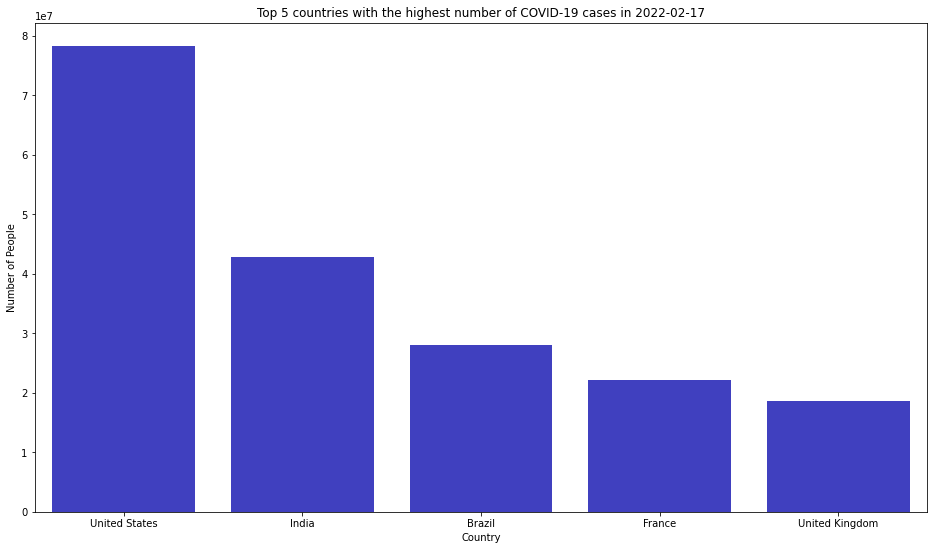

In [167]:
fig, ax = plt.subplots(figsize=(16, 9)) # Sets the size of the plot.

# Generates a bar plot of the top 5 countries with the highest number of COVID-19 cases in 2022-02-17.
sns.barplot(x="location", y="total_cases", data=top_5_countries_by_cases_df, color='blue', saturation=0.5) 
plt.xlabel('Country') # x-axis label.
plt.ylabel('Number of People') # y-axis label.
plt.title('Top 5 countries with the highest number of COVID-19 cases in 2022-02-17') # Title of plot.
plt.show() # Displays the plot.

In 2022-02-17, the top 5 countries with the highest number of COVID-19 cases were:
* United States of America
* India
* Brazil
* France
* United Kingdom

**What are the top 5 countries with the highest number of COVID-19 cases in 2022-02-17?**

In [168]:
# Sorts the "max_date_df" DataFrame in descending order by the "total_deaths" column, and stores the result in a new DataFrame.
deaths_df = max_date_df.sort_values(by='total_deaths', ascending=False)

# Obtains the first 5 rows of the "deaths_df" DataFrame, and stores the result in a new DataFrame.
top_5_countries_by_deaths_df = deaths_df.iloc[:5]

# Converts each value in the "location" column of the "top_5_countries_by_cases_df" DataFrame into title case.
top_5_countries_by_deaths_df['location'] = top_5_countries_by_deaths_df['location'].str.title() 

C:\Users\dehos\AppData\Local\Temp/ipykernel_24712/1801663987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_countries_by_deaths_df['location'] = top_5_countries_by_deaths_df['location'].str.title()


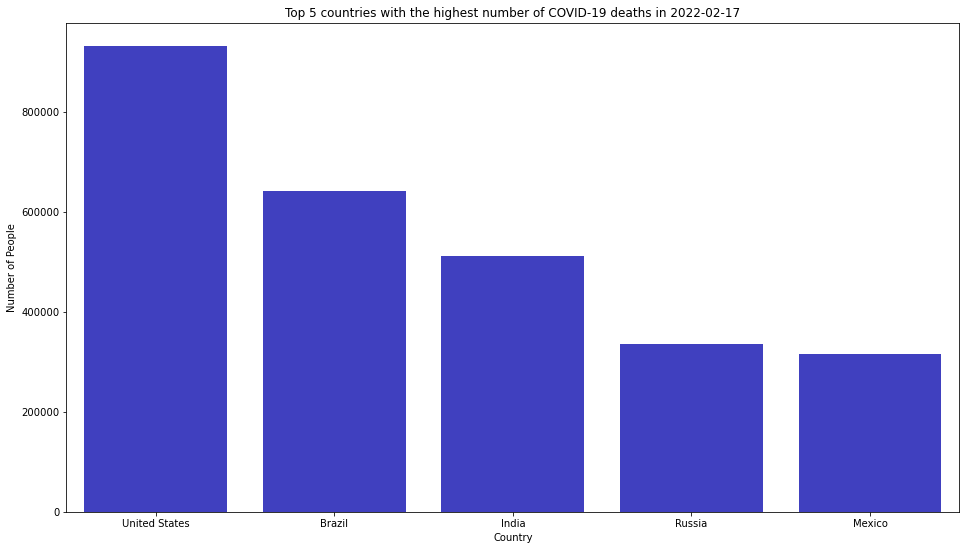

In [169]:
fig, ax = plt.subplots(figsize=(16, 9)) # Sets the size of the plot.

# Generates a bar plot of the top 5 countries with the highest number of COVID-19 deaths in 2022-02-17.
sns.barplot(x="location", y="total_deaths", data=top_5_countries_by_deaths_df, color='blue', saturation=0.5) 
plt.xlabel('Country') # x-axis label.
plt.ylabel('Number of People') # y-axis label.
plt.title('Top 5 countries with the highest number of COVID-19 deaths in 2022-02-17') # Title of plot.
plt.show() # Displays the plot.

In 2022-02-17, the top 5 countries with the highest number of COVID-19 deaths were:
* United States of America
* Brazil
* India
* Russia
* Mexico

**What is the worldwide distribution of COVID-19 cases in 2022-02-17?**

In [170]:
# Obtains the values in the "location" column of the 'max_date_df' DataFrame, and then convert it into a NumPy array.
countries = max_date_df['location'].to_numpy()
# Obtains the values in the "latitude" column of the 'max_date_df' DataFrame, and then convert it into a NumPy array.
latitudes = max_date_df['latitude'].to_numpy()
# Obtains the values in the "longitude" column of the 'max_date_df' DataFrame, and then convert it into a NumPy array.
longitudes = max_date_df['longitude'].to_numpy()
# Obtains the values in the "total_cases" column of the 'max_date_df' DataFrame, and then convert it into a NumPy array.
total_cases = max_date_df['total_cases'].to_numpy()
# Obtains the values in the "total_deaths" column of the 'max_date_df' DataFrame, and then convert it into a NumPy array.
total_deaths = max_date_df['total_deaths'].to_numpy()

In [171]:
world_map = folium.Map(location=[0, 0], zoom_start=2) # Creates a map of the world for geospatial visualization.

# Loops through each country, latitude and total cases per country in each of the lists simultaneously.
for country, latitude, longitude, total_cases_per_country in zip(countries, latitudes, longitudes, total_cases):
    # Creates a "CircleMarker" object for marking a circle on the map.
    folium.CircleMarker(
        location=[latitude, longitude], # Latitude and Longitude of the country.
        # Radius of the circle. The size of the circle would represent the number of COVID-19 cases in the country.
        radius=(total_cases_per_country/1000000), 
        # The text to be displayed when the mouse cursor hovers over it.
        tooltip=f'{country.title()} -> {int(total_cases_per_country):,d} cases', 
        # The color of the circle.
        fill_color='blue').add_to(world_map) # Adds the cirlce to the map.
    
world_map # Displays the map.

From the map generated, it was observed that the country with the highest number of COVID-19 cases (in 2022-02-17) was the United States of America, with a value of 78,269,443 cases.

**What is the worldwide distribution of COVID-19 deaths in 2022-02-17?**

In [172]:
world_map = folium.Map(location=[0, 0], zoom_start=2) # Creates a map of the world for geospatial visualization.

# Loops through each country, latitude and total deaths per country in each of the lists simultaneously.
for country, latitude, longitude, total_deaths_per_country in zip(countries, latitudes, longitudes, total_deaths):
    # Creates a "CircleMarker" object for marking a circle on the map.
    folium.CircleMarker(
        location=[latitude, longitude], # Latitude and Longitude of the country.
        # Radius of the circle. The size of the circle would represent the number of COVID-19 deaths in the country.
        radius=(total_deaths_per_country/25000), 
        # The text to be displayed when the mouse cursor hovers over it.
        tooltip=f'{country.title()} -> {int(total_deaths_per_country):,d} deaths', 
        # The color of the circle.
        fill_color='red').add_to(world_map) # Adds the cirlce to the map.
    
world_map # Displays the map.

From the map generated, it was observed that the country with the highest number of COVID-19 deaths (in 2022-02-17) was the United States of America, with a value of 931,741 deaths. 

**Since the United States of America had the highest number of COVID-19 cases and deaths in 2022-02-17, when did the United States of America experienced a spike in cases and deaths related to COVID-19?**

In [173]:
condition = df['location'] == 'united states' # Condition to filter the "df" DataFrame with the country being "United States".
usa_df = df.loc[condition] # Applies the condition to the "df" DataFrame, and returns a new DataFrame.

In [174]:
# Obtains the values in the "date" column of the 'usa_df' DataFrame, and then convert it into a NumPy array.
dates = usa_df['date'].to_numpy()
# Obtains the values in the "total_cases" column of the 'usa_df' DataFrame, and then convert it into a NumPy array.
total_cases = usa_df['total_cases'].to_numpy()
# Obtains the values in the "total_deaths" column of the 'usa_df' DataFrame, and then convert it into a NumPy array.
total_deaths = usa_df['total_deaths'].to_numpy()

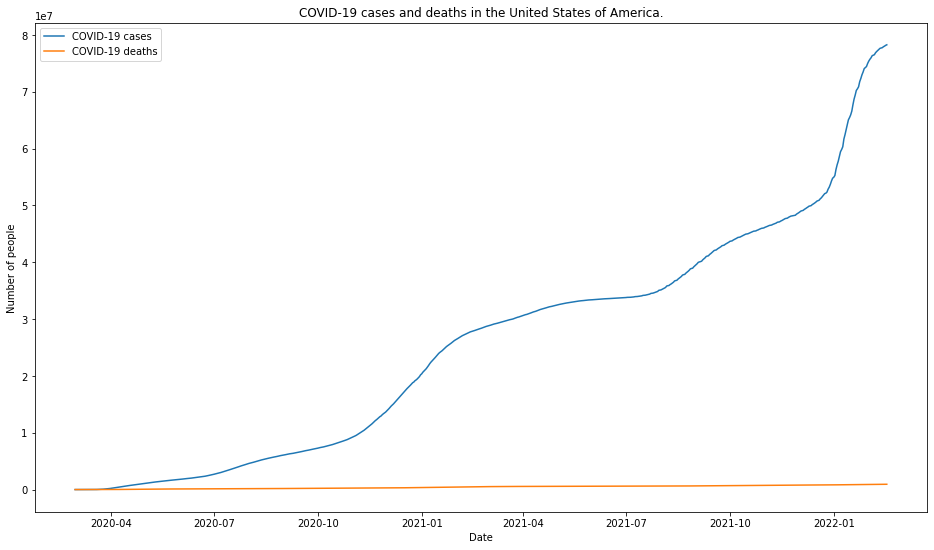

In [175]:
fig, ax = plt.subplots(figsize=(16, 9)) # Sets the size of the plot.
plt.plot(dates, total_cases, label='COVID-19 cases') # Generates a line plot of the number of COVID-19 cases with time.
plt.plot(dates, total_deaths, label='COVID-19 deaths') # Generates a line plot of the number of COVID-19 deaths with time.
plt.xlabel('Date') # x-axis label.
plt.ylabel('Number of people') # y-axis label.
plt.title('COVID-19 cases and deaths in the United States of America.') # Title of plot.
plt.legend() # Displays the legend.
plt.show() # Displays the plot.

Around December 2020 where the number of COVID-19 cases was approximately 10 million, there was a sudden spike in COVID-19 cases. The number of cases increased in a relatively steep trend (having some fluctuations), and continued up until January 2022. In January 2022, the number of cases reached below 80 million, and the number of cases still continue to increase.

In April 2020, the number of COVID-19 deaths was relativley low. The number of deaths steadily increased until January 2022, where the number of COVID-19 deaths was below 1 million. The number of deaths still continue to increase.

## CONCLUSION <a class="anchor" id="conclusion">

## REFERENCES<a class="anchor" id="references">

[1] <a class="anchor" id="1"></a> https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus

[2] <a class="anchor" id="2"></a> https://www.webmd.com/lung/coronavirus

[3] <a class="anchor" id="3"></a> https://www.ccjm.org/content/87/6/321

## APPENDIX<a class="anchor" id="appendix">